# Web Scraping

In [199]:
%matplotlib inline
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [120]:
# Matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

## 코로나19 대전 확진자 현황

### 코로나19 대전 확진자 현황 자료 수집

https://www.daejeon.go.kr/corona19/index.do?menuId=0002

In [347]:
url = 'https://www.daejeon.go.kr/corona19/index.do?menuId=0002'

covid19_status = requests.get( url ).text
soup_covid19_status = BeautifulSoup( covid19_status, 'lxml' )
soup_covid19_status

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="대전광역시 코로나19" name="keywords"/>
<meta content="대전광역시, 코로나19" name="description"/>
<script src="/corona19/js/drh/layout/jquery-1.11.3.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/commonUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/stringUtil.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_util.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/system_board.js" type="text/javascript"></script>
<script src="/corona19/js/drh/layout/jquery.bxslider.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/jquery.form.min.js" type="text/javascript"></script>
<script src="/corona19/js/cmm/html5shiv.js" type="text/javascript"></script>
<script src="/corona19/js/drh/common.js" type="text/ja

### 제목

In [395]:
status_date = soup_covid19_status.select( '#content > div > strong' )
title = status_date[ 0 ].get_text()
title

"코로나19 대전 확진자 현황('20. 6. 25. 15시 기준)"

### 대전 확진자 번호를 이용한 확진자 전체 인원수 확인

In [396]:
max_count = soup_covid19_status.select( '#content > div > div > div:nth-child(1) > div > table > tbody > tr:nth-child(1) > td:nth-child(1) > p' )
max_count = int( max_count[ 0 ].get_text() )
max_count

101

### 확진자 전체 인원에 대한 web page 표 데이터 수집

In [397]:
rows = [ soup_covid19_status.select( '#content > div > div > div:nth-child(1) > div > table > tbody > tr:nth-child(' + str( index ) + ')' ) for index in range( 1, max_count + 1 ) ]
rows    

[[<tr>
  <td rowspan="1" style="width: 98px; height: 18px;">
  <p>101<br/></p></td>
  <td rowspan="1" style="width: 141px; height: 18px;">
  <p>미채번<br/></p></td>
  <td rowspan="1" style="width: 141px; height: 18px;">
  <p>6.25<br/></p></td>
  <td rowspan="1" style="width: 213px; height: 18px;">
  <p>여(50대)<br/></p></td>
  <td rowspan="1" style="width: 213px; height: 18px;">
  <p>서구<br/></p></td>
  <td rowspan="1" style="width: 242px; height: 18px;">
  <p>대전86번 확진자의 접촉자<br/></p></td>
  <td rowspan="1" style="width: 285px; height: 18px;">
  <p>충남대병원 입원(6.25)<br/></p></td>
  </tr>],
 [<tr>
  <td rowspan="1" style="width: 98px; height: 9px;">
  <p>100<br/></p></td>
  <td rowspan="1" style="width: 141px; height: 20px;">
  <p>미채번<br/></p></td>
  <td rowspan="1" style="width: 141px; height: 20px;">
  <p>6.24<br/></p></td>
  <td rowspan="1" style="width: 213px; height: 20px;">
  <p>여(50대)<br/></p></td>
  <td rowspan="1" style="width: 213px; height: 20px;">
  <p>중구<br/></p></td>
  <td rowspan="

### content 값만 추출( '\n' 기준으로 문자열 분리 )

In [398]:
rows = [ row[ 0 ].get_text().split( '\n' ) for row in rows ]
rows

[['',
  '',
  '101',
  '',
  '미채번',
  '',
  '6.25',
  '',
  '여(50대)',
  '',
  '서구',
  '',
  '대전86번 확진자의 접촉자',
  '',
  '충남대병원 입원(6.25)',
  ''],
 ['',
  '',
  '100',
  '',
  '미채번',
  '',
  '6.24',
  '',
  '여(50대)',
  '',
  '중구',
  '',
  '대전86번 확진자의 접촉자',
  '',
  '충남대병원 입원(6.25)',
  ''],
 ['',
  '',
  '99',
  '',
  '미채번',
  '',
  '6.24',
  '',
  '여(80대)',
  '',
  '서구',
  '',
  '열매노인요양원',
  '',
  '충남대병원 입원(6.25)',
  ''],
 ['',
  '',
  '98',
  '',
  '12560',
  '',
  '6.24',
  '',
  '남(50대)',
  '',
  '유성구',
  '',
  '대전60번 확진자의 접촉자',
  '',
  '충남대병원 입원(6.25)',
  ''],
 ['',
  '',
  '97',
  '',
  '12559',
  '',
  '6.24',
  '',
  '여(50대)',
  '',
  '유성구',
  '',
  '대전92번 확진자의 접촉자',
  '',
  '충남대병원 입원(6.25)',
  ''],
 ['',
  '',
  '96',
  '',
  '12541',
  '',
  '6.24',
  '',
  '여(60대)',
  '',
  '서구',
  '',
  '대한토지법인 콜센터',
  '',
  '충남대병원 입원(6.24)',
  ''],
 ['',
  '',
  '95',
  '',
  '12540',
  '',
  '6.24',
  '',
  '여(50대)',
  '',
  '서구',
  '',
  '대전86번 확진자의 접촉자',
  '',
  '충남대병원 입원(6.24)',
  ''],
 ['',

### 확진자를 list에 추가

In [399]:
confirmers = [ [ value for value in datas if value ] for datas in rows ]
confirmers

[['101', '미채번', '6.25', '여(50대)', '서구', '대전86번 확진자의 접촉자', '충남대병원 입원(6.25)'],
 ['100', '미채번', '6.24', '여(50대)', '중구', '대전86번 확진자의 접촉자', '충남대병원 입원(6.25)'],
 ['99', '미채번', '6.24', '여(80대)', '서구', '열매노인요양원', '충남대병원 입원(6.25)'],
 ['98', '12560', '6.24', '남(50대)', '유성구', '대전60번 확진자의 접촉자', '충남대병원 입원(6.25)'],
 ['97', '12559', '6.24', '여(50대)', '유성구', '대전92번 확진자의 접촉자', '충남대병원 입원(6.25)'],
 ['96', '12541', '6.24', '여(60대)', '서구', '대한토지법인 콜센터', '충남대병원 입원(6.24)'],
 ['95', '12540', '6.24', '여(50대)', '서구', '대전86번 확진자의 접촉자', '충남대병원 입원(6.24)'],
 ['94', '12531', '6.24', '여(50대)', '서구', '대전86번 확진자의 가족', '충남대병원 입원(6.24)'],
 ['93', '12532', '6.24', '여(50대)', '서구', '오렌지타운', '충남대병원 입원(6.24)'],
 ['92', '12533', '6.23', '남(60대)', '유성구', '둔산전자타운', '충남대병원 입원(6.24)'],
 ['91', '12521', '6.23', '남(70대)', '유성구', '둔산전자타운', '충남대병원 입원(6.23)'],
 ['90', '12499', '6.23', '여(60대)', '서구', '옛날보리밥집', '충남대병원 입원(6.23)'],
 ['89', '12519', '6.23', '남(50대)', '유성구', '경하온천호텔(남성사우나)', '충남대병원 입원(6.23)'],
 ['88', '12157', '6.23', '여(60대

### 확진자 list 내용 출력

In [400]:
for confirmer in confirmers:
    if len( confirmer ) > 6:
        print( '[ {:>3s} ] {:10s} {:8s} {:6s} {:10s} {:<20s} {:<20s}'.format( confirmer[ 0 ],
                                                                              confirmer[ 1 ],
                                                                              confirmer[ 2 ],
                                                                              confirmer[ 3 ],
                                                                              confirmer[ 4 ], 
                                                                              confirmer[ 5 ],
                                                                              confirmer[ 6 ] ) )
    else:
        print( '[ {:>3s} ] {:10s} {:8s} {:6s} {:10s} {:<20s} {:<20s}'.format( confirmer[ 0 ],
                                                                              confirmer[ 1 ],
                                                                              confirmer[ 2 ],
                                                                              confirmer[ 3 ],
                                                                              confirmer[ 4 ], 
                                                                              "",
                                                                              confirmer[ 5 ] ) )        

[ 101 ] 미채번        6.25     여(50대) 서구         대전86번 확진자의 접촉자       충남대병원 입원(6.25)      
[ 100 ] 미채번        6.24     여(50대) 중구         대전86번 확진자의 접촉자       충남대병원 입원(6.25)      
[  99 ] 미채번        6.24     여(80대) 서구         열매노인요양원              충남대병원 입원(6.25)      
[  98 ] 12560      6.24     남(50대) 유성구        대전60번 확진자의 접촉자       충남대병원 입원(6.25)      
[  97 ] 12559      6.24     여(50대) 유성구        대전92번 확진자의 접촉자       충남대병원 입원(6.25)      
[  96 ] 12541      6.24     여(60대) 서구         대한토지법인 콜센터           충남대병원 입원(6.24)      
[  95 ] 12540      6.24     여(50대) 서구         대전86번 확진자의 접촉자       충남대병원 입원(6.24)      
[  94 ] 12531      6.24     여(50대) 서구         대전86번 확진자의 가족        충남대병원 입원(6.24)      
[  93 ] 12532      6.24     여(50대) 서구         오렌지타운                충남대병원 입원(6.24)      
[  92 ] 12533      6.23     남(60대) 유성구        둔산전자타운               충남대병원 입원(6.24)      
[  91 ] 12521      6.23     남(70대) 유성구        둔산전자타운               충남대병원 입원(6.23)      
[  90 ] 12499      6.23     여(60

### 확진자 정보를 변수별로 dictionary 생성

In [429]:
covid_confirmer_d = {}
covid_confirmer_d[ 'daejeon_confirmer_no' ] = [ confirmer[ 0 ] for confirmer in confirmers ]
covid_confirmer_d[ 'cdc_no' ] = [ confirmer[ 1 ] for confirmer in confirmers ]

# 날짜형태로 변경하여 list 생성 후 dictionary에 추가
confirme_date = [ '2002.' + confirmer[ 2 ] for confirmer in confirmers ]
for i, v in enumerate( confirme_date ):
    if len( v ) == 8:
        confirme_date[ i ] = v[ :7 ] + '0' + v[ 7: ]
covid_confirmer_d[ 'confirm_date' ] = confirme_date

covid_confirmer_d[ 'gender_age' ] = [ confirmer[ 3 ] for confirmer in confirmers ]
covid_confirmer_d[ 'residence' ] = [ confirmer[ 4 ] for confirmer in confirmers ]

In [430]:
# 접촉력, 조치사항에 대한 list 생성 및 dictionary 생성
contact_force = []
action = []
for confirmer in confirmers:
    if len( confirmer ) > 6:
        contact_force.append( confirmer[ 5 ] )
        action.append( confirmer[ 6 ] )
    else:
        contact_force.append( '' )
        action.append( confirmer[ 5 ] )
covid_confirmer_d[ 'contact_force' ] = contact_force
covid_confirmer_d[ 'action' ] = action

### DataFrame 생성

In [432]:
df = pd.DataFrame( covid_confirmer_d, index = range( len( daejeon_confirmer_no ), 0, -1 ) )

In [433]:
df.head( 10 )

,daejeon_confirmer_no,cdc_no,confirm_date,gender_age,residence,contact_force,action
101,101,미채번,2002.6.25,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.25)
100,100,미채번,2002.6.24,여(50대),중구,대전86번 확진자의 접촉자,충남대병원 입원(6.25)
99,99,미채번,2002.6.24,여(80대),서구,열매노인요양원,충남대병원 입원(6.25)
98,98,12560,2002.6.24,남(50대),유성구,대전60번 확진자의 접촉자,충남대병원 입원(6.25)
97,97,12559,2002.6.24,여(50대),유성구,대전92번 확진자의 접촉자,충남대병원 입원(6.25)
96,96,12541,2002.6.24,여(60대),서구,대한토지법인 콜센터,충남대병원 입원(6.24)
95,95,12540,2002.6.24,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.24)
94,94,12531,2002.6.24,여(50대),서구,대전86번 확진자의 가족,충남대병원 입원(6.24)
93,93,12532,2002.6.24,여(50대),서구,오렌지타운,충남대병원 입원(6.24)
92,92,12533,2002.6.23,남(60대),유성구,둔산전자타운,충남대병원 입원(6.24)


In [434]:
df.tail( 10 )

,daejeon_confirmer_no,cdc_no,confirm_date,gender_age,residence,contact_force,action
10,10,1788,2002.2.27,남(30대),서구,대전 6번 접촉자,완치(3.27)
9,9,1569,2002.2.26,남(70대),공주 (서구에 포함),,완치(3.21)
8,8,1568,2002.2.26,남(30대),서구,대전 5번 접촉자,완치(3.26)
7,7,1856,2002.2.26,남(30대),서구,대전 5번 접촉자,완치(3.26)
6,6,1257,2002.2.26,여(40대),대덕,재확진 완치,완치(4.24)
5,5,1252,2002.2.26,남(30대),유성,,완치(3.9)
4,4,1256,2002.2.26,여(40대),유성,,완치(3.2)
3,3,573,2002.2.23,남(60대),유성,대전 2번 접촉자,완치(5.5)
2,2,372,2002.2.22,여(60대),유성,,완치(3.28)
1,1,241,2002.2.21,여(20대),서울 (동구에 포함),,완치(3.4)


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 101 to 1
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   daejeon_confirmer_no  101 non-null    object
 1   cdc_no                101 non-null    object
 2   confirm_date          101 non-null    object
 3   gender_age            101 non-null    object
 4   residence             101 non-null    object
 5   contact_force         101 non-null    object
 6   action                101 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


## Data Preprocessing

### 정규 표현식을 이용한 나이 변수 추가 및 범주형으로 변환

In [435]:
gender_age = df[ 'gender_age' ]
ages = [ int( re.findall( '\d+', value )[ 0 ] ) for value in gender_age.values ]

In [436]:
df[ 'age' ] = ages

In [437]:
df[ 'age' ] = df[ 'age' ].astype( 'category' )

In [438]:
df.head( 10 )

,daejeon_confirmer_no,cdc_no,confirm_date,gender_age,residence,contact_force,action,age
101,101,미채번,2002.6.25,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.25),50
100,100,미채번,2002.6.24,여(50대),중구,대전86번 확진자의 접촉자,충남대병원 입원(6.25),50
99,99,미채번,2002.6.24,여(80대),서구,열매노인요양원,충남대병원 입원(6.25),80
98,98,12560,2002.6.24,남(50대),유성구,대전60번 확진자의 접촉자,충남대병원 입원(6.25),50
97,97,12559,2002.6.24,여(50대),유성구,대전92번 확진자의 접촉자,충남대병원 입원(6.25),50
96,96,12541,2002.6.24,여(60대),서구,대한토지법인 콜센터,충남대병원 입원(6.24),60
95,95,12540,2002.6.24,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.24),50
94,94,12531,2002.6.24,여(50대),서구,대전86번 확진자의 가족,충남대병원 입원(6.24),50
93,93,12532,2002.6.24,여(50대),서구,오렌지타운,충남대병원 입원(6.24),50
92,92,12533,2002.6.23,남(60대),유성구,둔산전자타운,충남대병원 입원(6.24),60


### 정규 표현식을 이용한 성별 변수 추가 및 범주형으로 변환

In [439]:
genders = [ re.findall( '[남,여]', value )[ 0 ]  for value in gender_age.values ]

In [440]:
df[ 'gender' ] = genders

In [441]:
df[ 'gender' ] = df[ 'gender' ].astype( 'category' )

In [442]:
df.head( 10 )

,daejeon_confirmer_no,cdc_no,confirm_date,gender_age,residence,contact_force,action,age,gender
101,101,미채번,2002.6.25,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.25),50,여
100,100,미채번,2002.6.24,여(50대),중구,대전86번 확진자의 접촉자,충남대병원 입원(6.25),50,여
99,99,미채번,2002.6.24,여(80대),서구,열매노인요양원,충남대병원 입원(6.25),80,여
98,98,12560,2002.6.24,남(50대),유성구,대전60번 확진자의 접촉자,충남대병원 입원(6.25),50,남
97,97,12559,2002.6.24,여(50대),유성구,대전92번 확진자의 접촉자,충남대병원 입원(6.25),50,여
96,96,12541,2002.6.24,여(60대),서구,대한토지법인 콜센터,충남대병원 입원(6.24),60,여
95,95,12540,2002.6.24,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.24),50,여
94,94,12531,2002.6.24,여(50대),서구,대전86번 확진자의 가족,충남대병원 입원(6.24),50,여
93,93,12532,2002.6.24,여(50대),서구,오렌지타운,충남대병원 입원(6.24),50,여
92,92,12533,2002.6.23,남(60대),유성구,둔산전자타운,충남대병원 입원(6.24),60,남


### 거주지 범주형으로 변환

In [443]:
df[ 'residence' ] = df[ 'residence' ].astype( 'category' )

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 101 to 1
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   daejeon_confirmer_no  101 non-null    object  
 1   cdc_no                101 non-null    object  
 2   confirm_date          101 non-null    object  
 3   gender_age            101 non-null    object  
 4   residence             101 non-null    category
 5   contact_force         101 non-null    object  
 6   action                101 non-null    object  
 7   age                   101 non-null    category
 8   gender                101 non-null    category
dtypes: category(3), object(6)
memory usage: 6.0+ KB


### 범주형 변수에 대한 범주별 데이터수 

In [449]:
# 나이별 인원
s = df[ 'age' ].value_counts()
s

50    28
60    27
20    17
70     8
40     7
30     6
10     4
80     3
90     1
Name: age, dtype: int64

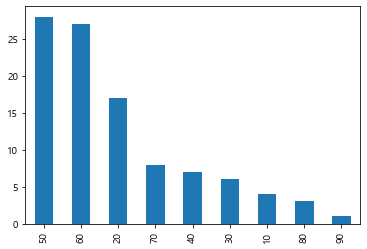

In [450]:
s.plot( kind = 'bar' )

In [451]:
# 성별 인원
s = df[ 'gender' ].value_counts()
s

여    59
남    42
Name: gender, dtype: int64

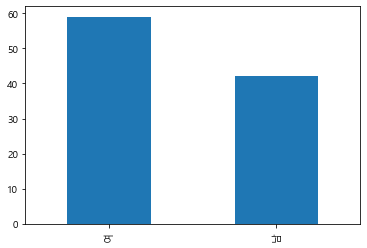

In [452]:
s.plot( kind = 'bar' )

In [466]:
# 날짜별 인원( 확진자가 많이 발생된 순서 )
s = df[ 'confirm_date' ].value_counts()
s

2002.6.20    10
2002.6.24     8
2002.6.18     7
2002.6.23     7
2002.6.17     6
2002.2.26     6
2002.6.16     6
2002.6.19     4
2002.3.24     3
2002.6.15     3
2002.3.25     3
2002.6.22     3
2002.2.28     3
2002.3.04     3
2002.3.28     3
2002.5.11     2
2002.3.30     2
2002.4.05     2
2002.3.21     2
2002.3.12     2
2002.3.11     2
2002.5.30     1
2002.5.16     1
2002.2.22     1
2002.4.04     1
2002.2.23     1
2002.5.06     1
2002.2.27     1
2002.3.01     1
2002.4.21     1
2002.3.26     1
2002.5.22     1
2002.3.03     1
2002.2.21     1
2002.6.25     1
Name: confirm_date, dtype: int64

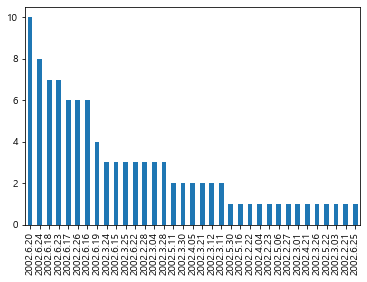

In [467]:
s.plot( kind = 'bar' )

In [477]:
# 날짜순 인원
confirm_date_group = df.groupby( [ 'confirm_date' ] )
s = confirm_date_group.confirm_date.count()
s

confirm_date
2002.2.21     1
2002.2.22     1
2002.2.23     1
2002.2.26     6
2002.2.27     1
2002.2.28     3
2002.3.01     1
2002.3.03     1
2002.3.04     3
2002.3.11     2
2002.3.12     2
2002.3.21     2
2002.3.24     3
2002.3.25     3
2002.3.26     1
2002.3.28     3
2002.3.30     2
2002.4.04     1
2002.4.05     2
2002.4.21     1
2002.5.06     1
2002.5.11     2
2002.5.16     1
2002.5.22     1
2002.5.30     1
2002.6.15     3
2002.6.16     6
2002.6.17     6
2002.6.18     7
2002.6.19     4
2002.6.20    10
2002.6.22     3
2002.6.23     7
2002.6.24     8
2002.6.25     1
Name: confirm_date, dtype: int64

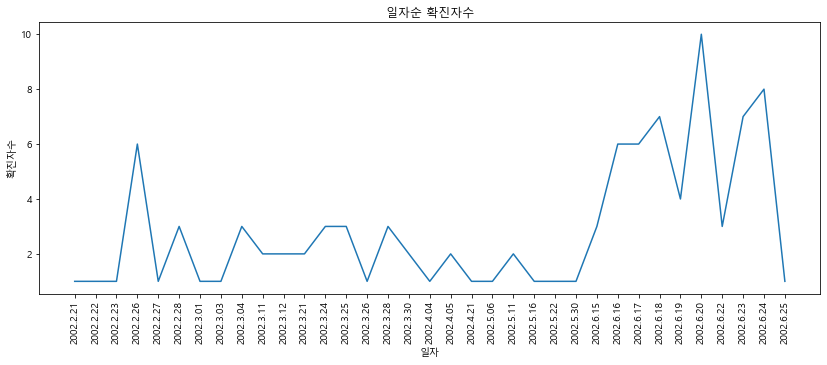

In [478]:
plt.figure( figsize = ( 14, 5 ) )

plt.xticks( rotation = 'vertical' )

plt.plot( s.index, s.values )

plt.title( '일자별 확진자수' )

plt.xlabel( '일자' )
plt.ylabel( '확진자수' )

plt.show()

In [485]:
# 거주지별 인원
df[ 'residence' ].value_counts()

서구             38
유성구            35
중구             10
유성              5
동구              4
대덕구             3
세종시             2
수원              1
서울 (동구에 포함)     1
대덕              1
공주 (서구에 포함)     1
Name: residence, dtype: int64

### 거주지중 대덕, 유성을 대덕구, 유성구로 변경

In [486]:
def change_residence( str ):
    if str == '유성':
        ret_str = '유성구'
    elif str == '대덕':
        ret_str = '대덕구'
    else:
        ret_str = str
        
    return ret_str

In [487]:
df = df.applymap( change_residence )
df.head( 10 )

,daejeon_confirmer_no,cdc_no,confirm_date,gender_age,residence,contact_force,action,age,gender
101,101,미채번,2002.6.25,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.25),50,여
100,100,미채번,2002.6.24,여(50대),중구,대전86번 확진자의 접촉자,충남대병원 입원(6.25),50,여
99,99,미채번,2002.6.24,여(80대),서구,열매노인요양원,충남대병원 입원(6.25),80,여
98,98,12560,2002.6.24,남(50대),유성구,대전60번 확진자의 접촉자,충남대병원 입원(6.25),50,남
97,97,12559,2002.6.24,여(50대),유성구,대전92번 확진자의 접촉자,충남대병원 입원(6.25),50,여
96,96,12541,2002.6.24,여(60대),서구,대한토지법인 콜센터,충남대병원 입원(6.24),60,여
95,95,12540,2002.6.24,여(50대),서구,대전86번 확진자의 접촉자,충남대병원 입원(6.24),50,여
94,94,12531,2002.6.24,여(50대),서구,대전86번 확진자의 가족,충남대병원 입원(6.24),50,여
93,93,12532,2002.6.24,여(50대),서구,오렌지타운,충남대병원 입원(6.24),50,여
92,92,12533,2002.6.23,남(60대),유성구,둔산전자타운,충남대병원 입원(6.24),60,남


In [488]:
# 거주지별 인원
s = df[ 'residence' ].value_counts()
s

유성구            40
서구             38
중구             10
동구              4
대덕구             4
세종시             2
서울 (동구에 포함)     1
공주 (서구에 포함)     1
수원              1
Name: residence, dtype: int64

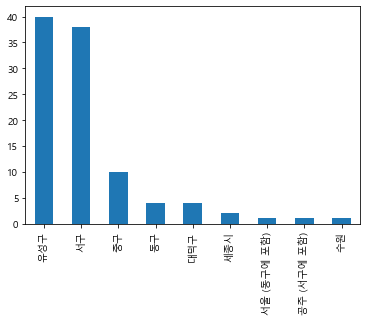

In [489]:
s.plot( kind = 'bar' )

# 코로나바이러스감염증-19(COVID-19) 시도별 발생동향

### 코로나바이러스감염증-19(COVID-19) 시도별 발생동향 자료 수집

http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=

In [289]:
url = 'http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun='

covid19_status = requests.get( url ).text
soup_covid19_status = BeautifulSoup( covid19_status, 'lxml' )
soup_covid19_status

<!DOCTYPE HTML>
<html lang="ko">
<head>
<title>코로나바이러스감염증-19 &gt; 발생동향 &gt; 시도별 발생동향
</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=yes" name="viewport"/>
<meta content="보건복지부, 코로나바이러스감염증-19(COVID-19), 질병관리본부" name="author"/>
<meta content="코로나바이러스감염증-19(COVID-19), 코로나바이러스감염증-19, 코로나바이러스, 보건복지부" name="keywords"/>
<meta content="보건복지부" name="copyright"/>
<meta content="http://ncov.mohw.go.kr/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="코로나바이러스감염증-19(COVID-19)" property="og:site_name"/>
<meta content="ko" property="og:locale"/>
<meta content="코로나바이러스감염증-19(COVID-19)" property="og:title"/>
<meta content="http://ncov.mohw.go.kr/static/image/header/homeimg.png" property="og:image"/>
<link href="/static/image/header/ROK.png;jsessionid=1enKa0aufgKahwNxtyy9KFt3kkagX9WydKf5OaAp1BgENiTM4SB9tg1lRA7P8Uwf.mohwwas1_servlet_engine40" rel="icon" sizes="64x64" 

## 시도별 발생동향 data 획득 및 데이터프레임 생성

In [313]:
citys = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > th' )[ 0 ].get_text() for i in range( 1, 20 ) ]

In [314]:
covid19_occurrence_d = {}

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(3)
covid19_occurrence_d[ '해외유입' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(3)' )[ 0 ].get_text() for i in range( 1, 20 )]

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(4)
covid19_occurrence_d[ '지역발생' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(4)' )[ 0 ].get_text() for i in range( 1, 20 )]

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(5)
covid19_occurrence_d[ '확진환자' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(5)' )[ 0 ].get_text() for i in range( 1, 20 )]

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(6)
covid19_occurrence_d[ '격리중' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(6)' )[ 0 ].get_text() for i in range( 1, 20 )] 

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(7)
covid19_occurrence_d[ '격리해제' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(7)' )[ 0 ].get_text() for i in range( 1, 20 )]

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(8)
covid19_occurrence_d[ '사망자' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(8)' )[ 0 ].get_text() for i in range( 1, 20 )]

#content > div > div.data_table.midd.mgt24 > table > tbody > tr:nth-child(2) > td:nth-child(9)
covid19_occurrence_d[ '발생률' ] = [ soup_covid19_status.select( 'tbody > tr:nth-child(' + str( i ) + ') > td:nth-child(9)' )[ 0 ].get_text() for i in range( 1, 20 )]

In [315]:
df = pd.DataFrame( covid19_occurrence_d, index = citys )
df

,해외유입,지역발생,확진환자,격리중,격리해제,사망자,발생률
합계,5,23,"12,563","1,307","10,974",282,24.23
서울,1,8,"1,250",482,761,7,12.84
부산,0,0,152,7,142,3,4.46
대구,0,0,"6,903",25,"6,689",189,283.32
인천,0,1,334,151,182,1,11.3
광주,0,0,33,1,32,0,2.27
대전,0,4,98,53,44,1,6.65
울산,0,0,55,6,48,1,4.79
세종,0,0,49,2,47,0,14.31
경기,0,9,"1,146",346,777,23,8.65
